<a href="https://colab.research.google.com/github/gsahonero/computer-vision-course/blob/main/Week_3_Tutorial_1_OpenCV_and_GitHub_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

![Hi Yoda](https://media1.tenor.com/images/7d29a772aa929d30e02ec773676deade/tenor.gif?itemid=20020632)

</center>

Welcome back. It is our turn to uncover aspects regarding OpenCV and Git (specifically, GitHub). You might be wondering the reasons for targetting both. Well, OpenCV is one of the most common image processing libraries, available not only in Python but also in C++ and others. On the other hand, given that you will be submitting a CV project in the second half of this course, you require to know how does GitHub works. Thus, the topics for today will be:


*   OpenCV peculiarities on data formats
*   OpenCV usage with Colab
*   GitHub integration

For this only time, the tutorial will take place in a synchronic manner. 


# Defining what we will require

In [32]:
# The image portion of matplotlib is powerful to read images
import matplotlib.image as mpimg 
# We can import the whole matplotlib and call it mpl - for friends only, 
# of course
import matplotlib as mpl
# OpenCV importation
import cv2
# OpenCV's original imshow opens a window in which the image is shown. Jupyter 
# notebooks don't allow this, and because of that Google was gently enough
# to write a patch to such function, the new function is called: cv2_imshow
# almost the same as cv2.imshow (the original function)  
from google.colab.patches import cv2_imshow
# To open a window
from IPython.display import display, Javascript
# Running Javascript
from google.colab.output import eval_js
# To handle binary data
from base64 import b64decode
# Requests allows to perform web requests
import requests
# Shutil is important to save data locally
import shutil
import numpy as np

## Helper Functions

In [33]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

def d_image(url, filename):
  # Thanks to https://towardsdatascience.com/how-to-download-an-image-using-python-38a75cfa21c
  r = requests.get(url, stream = True)
  # Check if the image was retrieved successfully
  if r.status_code == 200:
      # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
      r.raw.decode_content = True      
      # Open a local file with wb ( write binary ) permission.
      with open(filename,'wb') as f:
          shutil.copyfileobj(r.raw, f)          
      print('Image sucessfully Downloaded: ',filename)
  else:
      print('Image Couldn\'t be retreived')

def download_images():
  d_image("https://static.boredpanda.com/blog/wp-content/uploads/2016/01/cute-squirrel-photography-91__700.jpg", 
          'squirrel1.jpg')
  d_image('https://i.pinimg.com/originals/1d/b0/38/1db038965dcef1ebd3cc25fcd1ff0e8c.jpg',
          'squirrel2.jpg')
  d_image('https://mymodernmet.com/wp/wp-content/uploads/2018/12/squirrel-photos-geert-weggen-17.jpg',
          'squirrel3.jpg')
  d_image('https://en.bcdn.biz/Images/2016/9/2/63c1ba0e-85de-4ffe-85ba-d1f5ae23120a.jpg',
          'squirrel4.jpg')
download_images()

Image sucessfully Downloaded:  squirrel1.jpg
Image sucessfully Downloaded:  squirrel2.jpg
Image sucessfully Downloaded:  squirrel3.jpg
Image sucessfully Downloaded:  squirrel4.jpg


# OpenCV peculiarities on data formats

By default, OpenCV uses `uint8`, which mean that your images must be casted to that format. First, let's try to use the `imread` with `matplotlib`.

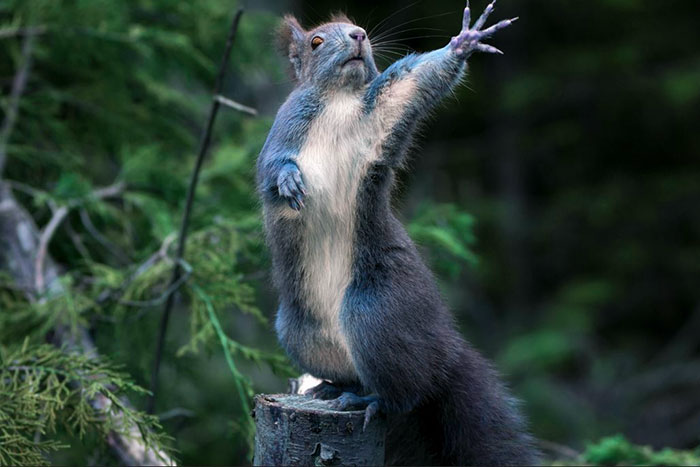

What happened?


In [34]:
image1 = mpimg.imread('/content/squirrel1.jpg')
cv2_imshow(image1)
print('What happened?')

OpenCV uses a different color space, rather than RGB it uses BGR, which means that images should be reordered or loaded through OpenCV's `imread`.

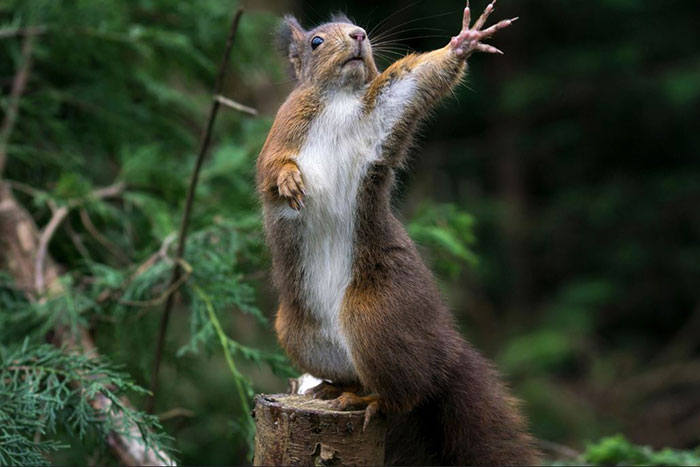

In [14]:
image1cv = cv2.imread('/content/squirrel1.jpg')
cv2_imshow(image1cv)
print("That's better!")

Furthermore, why did the image (`image1`) work on OpenCV? Well, it happens that `image1` holds only integer values and according to the specification of `uint8`, i.e. from 0 to 255. Let's verify that:

In [35]:
print('Max of image1:', np.max(image1))
print('Min of image1:', np.min(image1))
print('Now:')
print('Max of image1cv:', np.max(image1cv))
print('Min of image1cv:', np.min(image1cv))

Max of image1: 255
Min of image1: 0
Now:
Max of image1cv: 255
Min of image1cv: 0


Also, what about the type of the variable:

In [20]:
print(type(image1))
print(type(image1cv))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Both have the same variable type and have the same limits, thus, there is some compatibility between them. But, what about if our `image1` uses doubles:

Max of image1: 1.0
Min of image1: 0.0


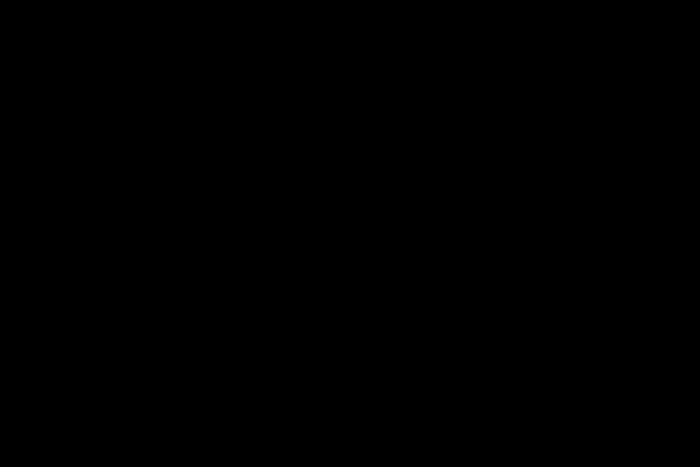

In [36]:
image1_double = image1/255.0
print('Max of image1:', np.max(image1_double))
print('Min of image1:', np.min(image1_double))
cv2_imshow(image1_double)

That broke the thing, ain't it?

Also, if we try to use some of the OpenCV optimized functions, we will have some issues:

In [37]:
new_image = cv2.cvtColor(image1_double, cv2.COLOR_BGR2HSV)
cv2_imshow(new_image)

error: ignored

But, if we use `uint8`:

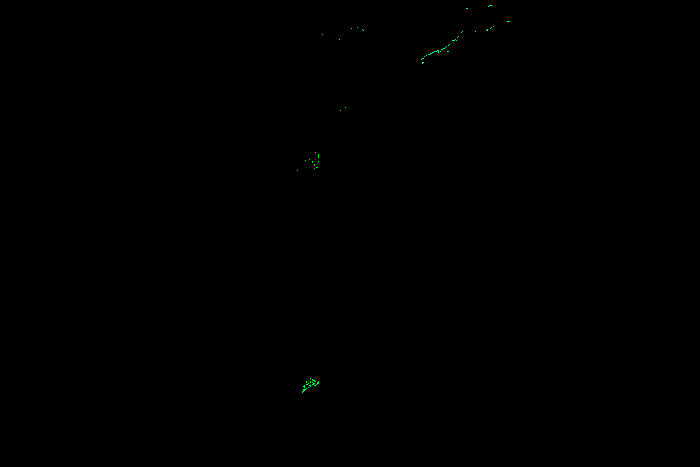

In [38]:
new_image = cv2.cvtColor(np.uint8(image1_double), cv2.COLOR_BGR2HSV)
cv2_imshow(new_image)

Well, it works, but it does not capture the image. What happened? We need them to be between 0 and 255, so:

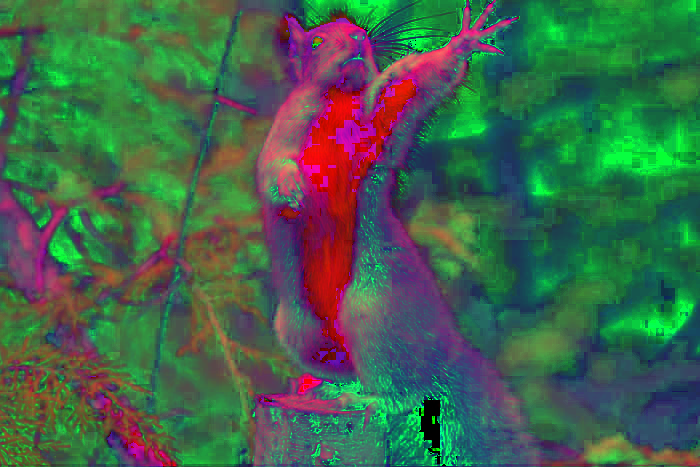

HSV is interesting...


In [41]:
new_image = image1_double * 255;
new_image = cv2.cvtColor(np.uint8(new_image), cv2.COLOR_BGR2HSV)
cv2_imshow(new_image)
print('HSV is interesting...')

# OpenCV usage with Colab

OpenCV allows users to capture images from cameras. But, for Google Colab, this becomes a bit difficult to do. Luckily, Google developed a turnaround for this through snippets they provide.

<IPython.core.display.Javascript object>

Saved to photo.jpg


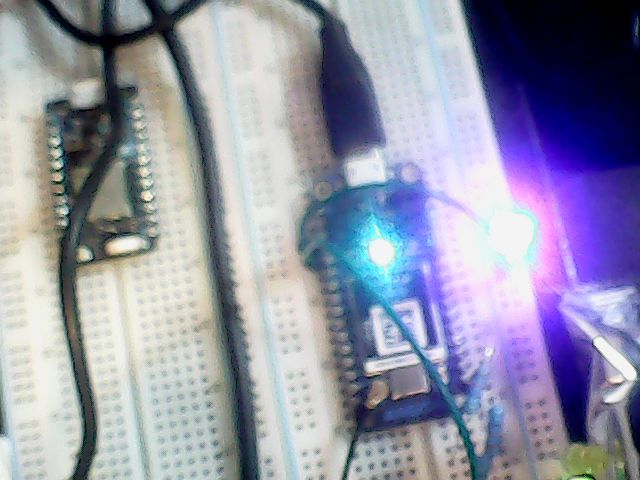

In [43]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## What happens in your PC?
Well, let's explore it...

# GitHub integration

As tasks:

1. Create a GitHub Repository
2. Save a copy of this notebook into the GitHub Repository
3. Make modifications to your notebook
4. Save your modifications in GitHub, again